In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
from datetime import datetime

In [2]:
# Define the path for the resources directory 
path = Path("Resources/")

# Load CSV files into pandas DataFrames
countries_dataset = pd.read_csv("Resources/countries.csv")
covid_cases_dataset = pd.read_csv("Resources/WHO COVID-19 cases.csv")

In [3]:
# Rename columns in countries dataset for clarity
countries_dataset = countries_dataset.rename(columns={'country':'Country_code', 'name':'Country'})
countries_dataset.head()

,Country_code,latitude,longitude,Country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [4]:
# Merge datasets on common column 'Country_code'
complete_dataset = pd.merge(covid_cases_dataset, countries_dataset, on="Country_code")
complete_dataset.head()

,Date_reported,Country_code,Country_x,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,latitude,longitude,Country_y
0,2020-01-05,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0,33.93911,67.709953,Afghanistan
1,2020-01-12,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0,33.93911,67.709953,Afghanistan
2,2020-01-19,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0,33.93911,67.709953,Afghanistan
3,2020-01-26,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0,33.93911,67.709953,Afghanistan
4,2020-02-02,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0,33.93911,67.709953,Afghanistan


In [5]:
# Drop unnecessary column
complete_dataset = complete_dataset.drop(columns=["Country_y"])
complete_dataset.head()

,Date_reported,Country_code,Country_x,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,latitude,longitude
0,2020-01-05,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0,33.93911,67.709953
1,2020-01-12,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0,33.93911,67.709953
2,2020-01-19,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0,33.93911,67.709953
3,2020-01-26,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0,33.93911,67.709953
4,2020-02-02,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0,33.93911,67.709953


In [6]:
# Rename columns for consistency and clarity
complete_dataset = complete_dataset.rename(columns={
    "Date_reported":"Date",
    "Country_code":"Country Code",
    "Country_x":"Country",
    "WHO_region":"WHO Region",
    "New_cases":"New Cases",
    "Cumulative_cases":"Cumulative Cases",
    "New_deaths":"New Deaths",
    "Cumulative_deaths":"Cumulative Deaths",
    "latitude":"Latitude",
    "longitude":"Longitude"
})
complete_dataset.head()

,Date,Country Code,Country,Continent,WHO Region,New Cases,Cumulative Cases,New Deaths,Cumulative Deaths,Latitude,Longitude
0,2020-01-05,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0,33.93911,67.709953
1,2020-01-12,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0,33.93911,67.709953
2,2020-01-19,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0,33.93911,67.709953
3,2020-01-26,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0,33.93911,67.709953
4,2020-02-02,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0,33.93911,67.709953


In [7]:
#identify empty and Nan rows
complete_dataset.count()

Date                 55632
Country Code         55388
Country              55632
Continent            55632
WHO Region           51728
New Cases            38384
Cumulative Cases     55632
New Deaths           24845
Cumulative Deaths    55632
Latitude             55632
Longitude            55632
dtype: int64

In [8]:
# Remove duplicate rows and drop rows with any missing values
complete_dataset = complete_dataset.drop_duplicates().dropna(how='any')
complete_dataset.head()

,Date,Country Code,Country,Continent,WHO Region,New Cases,Cumulative Cases,New Deaths,Cumulative Deaths,Latitude,Longitude
12,2020-03-29,AF,Afghanistan,Asia,EMRO,67.0,91,2.0,2,33.93911,67.709953
13,2020-04-05,AF,Afghanistan,Asia,EMRO,183.0,274,3.0,5,33.93911,67.709953
14,2020-04-12,AF,Afghanistan,Asia,EMRO,247.0,521,10.0,15,33.93911,67.709953
15,2020-04-19,AF,Afghanistan,Asia,EMRO,387.0,908,15.0,30,33.93911,67.709953
16,2020-04-26,AF,Afghanistan,Asia,EMRO,422.0,1330,13.0,43,33.93911,67.709953


In [9]:
# Check if NaN and zero value rows and columns were removed
complete_dataset.count()

Date                 23771
Country Code         23771
Country              23771
Continent            23771
WHO Region           23771
New Cases            23771
Cumulative Cases     23771
New Deaths           23771
Cumulative Deaths    23771
Latitude             23771
Longitude            23771
dtype: int64

In [10]:
#check the datatypes
complete_dataset.dtypes

Date                  object
Country Code          object
Country               object
Continent             object
WHO Region            object
New Cases            float64
Cumulative Cases       int64
New Deaths           float64
Cumulative Deaths      int64
Latitude             float64
Longitude            float64
dtype: object

In [11]:
# Change 'Date' column to datetime type
complete_dataset['Date'] = pd.to_datetime(complete_dataset['Date'])
#check if date datatypes changed
complete_dataset.dtypes

Date                 datetime64[ns]
Country Code                 object
Country                      object
Continent                    object
WHO Region                   object
New Cases                   float64
Cumulative Cases              int64
New Deaths                  float64
Cumulative Deaths             int64
Latitude                    float64
Longitude                   float64
dtype: object

In [12]:
# Aggregation: Group by country with additional statistics
country_group_data = complete_dataset.groupby('Country').agg({
    'New Cases': ['sum', 'mean', 'std'],
    'New Deaths': ['sum', 'mean', 'std']
})
country_group_data.head()

New Cases                           New Deaths             \
                     sum         mean          std        sum       mean   
Country                                                                    
Afghanistan     231053.0  1161.070352  1977.396762     7998.0  40.190955   
Albania         327824.0  2521.723077  2813.441094     3605.0  27.730769   
Algeria         266810.0  2403.693694  2453.310961     6881.0  61.990991   
American Samoa    5772.0   524.727273   632.815153       34.0   3.090909   
Andorra          34226.0   561.081967   748.456151      159.0   2.606557   

                           
                      std  
Country                    
Afghanistan     94.055237  
Albania         30.524304  
Algeria         50.263215  
American Samoa   1.972539  
Andorra          2.437750

In [13]:
# Use aggregation to find the max, min cases and deaths globally
country_stats = complete_dataset.groupby('Country').agg({
    'Cumulative Cases': 'max',
    'Cumulative Deaths': 'max'
}).reset_index()

In [14]:
# Find countries with maximum and minimum cases and deaths
max_cases_country = country_stats.loc[country_stats['Cumulative Cases'].idxmax()]
min_cases_country = country_stats.loc[country_stats['Cumulative Cases'].idxmin()]
max_deaths_country = country_stats.loc[country_stats['Cumulative Deaths'].idxmax()]
min_deaths_country = country_stats.loc[country_stats['Cumulative Deaths'].idxmin()]

# Display results
print("Country with Maximum Cases:", max_cases_country)
print("Country with Minimum Cases:", min_cases_country)
print("Country with Maximum Deaths:", max_deaths_country)
print("Country with Minimum Deaths:", min_deaths_country)

Country with Maximum Cases: Country              United States of America
Cumulative Cases                    103436829
Cumulative Deaths                     1127152
Name: 196, dtype: object
Country with Minimum Cases: Country              Montserrat
Cumulative Cases           1003
Cumulative Deaths             8
Name: 124, dtype: object
Country with Maximum Deaths: Country              United States of America
Cumulative Cases                    103436829
Cumulative Deaths                     1127152
Name: 196, dtype: object
Country with Minimum Deaths: Country              Nauru
Cumulative Cases      3970
Cumulative Deaths        1
Name: 128, dtype: object


In [15]:
# Filter data for Australia
australia_data = complete_dataset[complete_dataset['Country'] == 'Australia']
print(australia_data.head())

           Date Country Code    Country Continent WHO Region  New Cases  \
2693 2020-03-08           AU  Australia   Oceania       WPRO       45.0   
2694 2020-03-15           AU  Australia   Oceania       WPRO      179.0   
2695 2020-03-22           AU  Australia   Oceania       WPRO      832.0   
2696 2020-03-29           AU  Australia   Oceania       WPRO     2728.0   
2697 2020-04-05           AU  Australia   Oceania       WPRO     1826.0   

      Cumulative Cases  New Deaths  Cumulative Deaths   Latitude   Longitude  
2693                70         4.0                  4 -25.274398  133.775136  
2694               249         3.0                  7 -25.274398  133.775136  
2695              1081         2.0                  9 -25.274398  133.775136  
2696              3809         7.0                 16 -25.274398  133.775136  
2697              5635        20.0                 36 -25.274398  133.775136  


In [16]:
# Calculate average new cases in Australia
average_cases = australia_data['New Cases'].mean()
print(f"Average COVID-19 cases in Australia: {average_cases:.2f}")

Average COVID-19 cases in Australia: 64275.34


In [17]:
# Find the day with maximum and minimum cases and deaths in Australia
max_cases_day = australia_data.loc[australia_data['New Cases'].idxmax()]
min_cases_day = australia_data.loc[australia_data['New Cases'].idxmin()]
max_deaths_day = australia_data.loc[australia_data['New Deaths'].idxmax()]
min_deaths_day = australia_data.loc[australia_data['New Deaths'].idxmin()]

# Display results
print(f"Maximum cases: {max_cases_day['New Cases']} on {max_cases_day['Date'].date()}")
print(f"Minimum cases: {min_cases_day['New Cases']} on {min_cases_day['Date'].date()}")
print(f"Maximum deaths: {max_deaths_day['New Deaths']} on {max_deaths_day['Date'].date()}")
print(f"Minimum deaths: {min_deaths_day['New Deaths']} on {min_deaths_day['Date'].date()}")

Maximum cases: 588813.0 on 2022-01-09
Minimum cases: 28.0 on 2021-02-21
Maximum deaths: 1161.0 on 2023-02-05
Minimum deaths: -76.0 on 2023-07-23


In [18]:
# Summarize data for Australia using pivot_table()
pivot_summary = australia_data.pivot_table(
    index='Date', values=['New Cases', 'New Deaths'], aggfunc='sum'
).astype(int)
pivot_summary

,New Cases,New Deaths
Date,,
2020-03-08,45,4
2020-03-15,179,3
2020-03-22,832,2
2020-03-29,2728,7
2020-04-05,1826,20
...,...,...
2024-04-21,4424,34
2024-04-28,4657,21
2024-05-05,4866,16


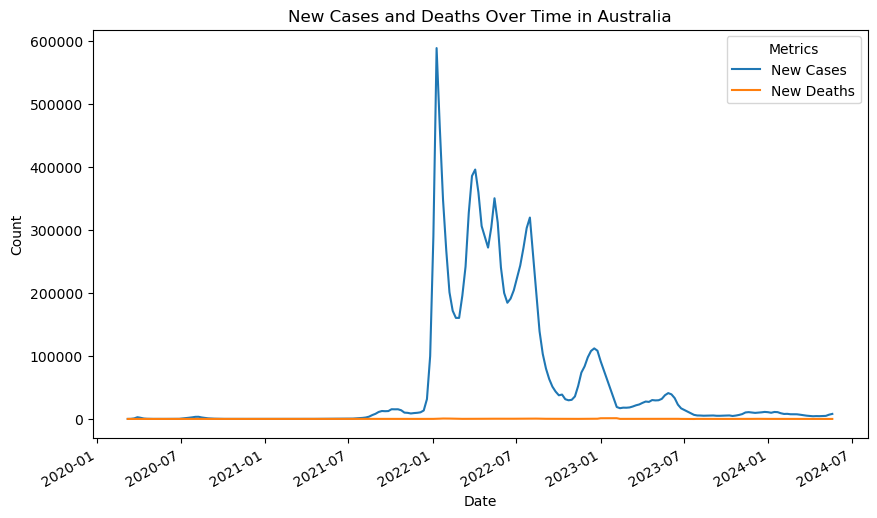

In [19]:
# Visualize pivot table summary
pivot_summary.plot(kind='line', figsize=(10, 6), title='New Cases and Deaths Over Time in Australia')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Metrics')
plt.show()

In [20]:
# Display ETL results before exporting data
complete_dataset.head()

,Date,Country Code,Country,Continent,WHO Region,New Cases,Cumulative Cases,New Deaths,Cumulative Deaths,Latitude,Longitude
12,2020-03-29,AF,Afghanistan,Asia,EMRO,67.0,91,2.0,2,33.93911,67.709953
13,2020-04-05,AF,Afghanistan,Asia,EMRO,183.0,274,3.0,5,33.93911,67.709953
14,2020-04-12,AF,Afghanistan,Asia,EMRO,247.0,521,10.0,15,33.93911,67.709953
15,2020-04-19,AF,Afghanistan,Asia,EMRO,387.0,908,15.0,30,33.93911,67.709953
16,2020-04-26,AF,Afghanistan,Asia,EMRO,422.0,1330,13.0,43,33.93911,67.709953


In [21]:
# Export complete dataset to CSV
complete_dataset.to_csv("Resources/complete_dataset.csv", index=False)